Griffin Shelor\
18-3-2024

# In-class Exercises: Pandas 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q1. Load 'lecture14_athletes_men400m.csv' and 'lecture15_athletes_menhammer.csv' into two different `DataFrames`

In [2]:
## reading in data
men400m_df = pd.read_csv('lecture14_athletes_men400m.csv')
menhammer_df = pd.read_csv('lecture15_athletes_menhammer.csv')

### Q2. Concatenate the two `DataFrames` into a single `DataFrame`

In [3]:
## combining data frames
men_athletes = pd.concat([men400m_df, menhammer_df])

### Q3. Use `.dropna()` to drop all `NaN` values in the merged `DataFrame`, and reset the index (row numbers). We'll be working with this `DataFrame` for the rest of the exercise.

In [4]:
athletes_clean = men_athletes.dropna()

In [5]:
athletes_clean

,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
83,Alonzo Carl Babers,M,22.0,188.0,70.0,United States,1984,Athletics Men's 400 meters,Gold
91,Andrzej Stanisaw Badeski,M,21.0,173.0,68.0,Poland,1964,Athletics Men's 400 meters,Bronze
98,"James Allan ""Jimmy"" Ball",M,25.0,180.0,69.0,Canada,1928,Athletics Men's 400 meters,Silver
107,"Raymond James ""Ray"" Barbuti",M,22.0,183.0,82.0,United States,1928,Athletics Men's 400 meters,Gold
146,Roger Anthony Black,M,30.0,190.0,79.0,Great Britain,1996,Athletics Men's 400 meters,Silver
...,...,...,...,...,...,...,...,...,...
638,"Peter Timothy ""Pete"" Zaremba",M,24.0,195.0,92.0,United States,1932,Athletics Men's Hammer Throw,Bronze
642,Szymon Zikowski,M,24.0,192.0,120.0,Poland,2000,Athletics Men's Hammer Throw,Gold
646,Gyula Zsivtzky,M,23.0,190.0,102.0,Hungary,1960,Athletics Men's Hammer Throw,Silver
647,Gyula Zsivtzky,M,27.0,190.0,102.0,Hungary,1964,Athletics Men's Hammer Throw,Silver


### Q4. Apply `groupby` to the 'Event' column, and and use this grouped `DataFrame` to plot histograms of 'Weight' for each group. 
* Make sure to look at the lecture to see how to do this - the example in the lecture grouped by 'Sex' and plotted histograms of 'Age' for each group.
* Here, we 'groupby' 'Event' and plot histograms of 'Weight' for each group.

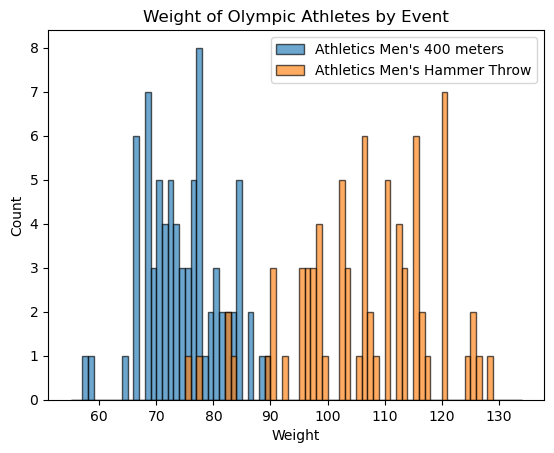

In [6]:
athletes_grp_event = athletes_clean.groupby("Event")
for group_key, group_value in athletes_grp_event:
    plt.hist(group_value["Weight"], range(55,135),
             alpha=0.65, label=group_key, edgecolor="k") # note the label to tag the group key
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight of Olympic Athletes by Event')
plt.legend(loc='best');

### Q5. Apply `groupby` to with both 'Event' and 'Year' (simultaneously). Use this grouped `DataFrame` to plot 'Year' on the x-axis and mean 'Weight' on the y-axis, with different symbols for the 400m and hammer throw athletes. 
* Make sure to look at the lecture to see how to do this - the example in the lecture grouped 400m athletes by 'Sex' and 'Year', then plotted 'Year' and mean 'Age' for male and female groups.
* Here we groupby 'Event' and 'Year', then plot 'Year' and mean 'Weight' for 400m and hammer throw groups.

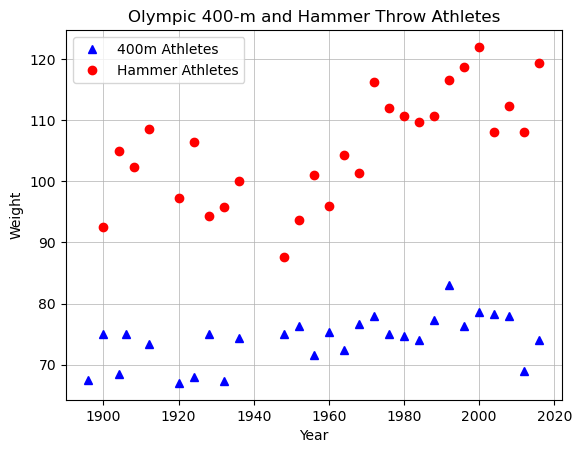

In [7]:
event_yr_grp = athletes_clean.groupby(["Event", "Year"],)

# Plot Age vs Year for each Group

# track the first time we plot for labeling purposes
first_hammer = True 
first_400m = True

# iterate over groups: these are (sex, year) tuples
#     - the values here are dataframe subsets of that (sex, year)
for group_key, group_value in event_yr_grp:
    
    # plot year versus mean age in each year: Men
    if(group_key[0] == "Athletics Men's 400 meters"): 
        if first_400m: # with label
            plt.plot(group_key[1], group_value["Weight"].mean(), 'b^', label = '400m Athletes')
            first_400m = False
        else:      # without label
            plt.plot(group_key[1], group_value["Weight"].mean(), 'b^')
    
    # plot year versus mean age in each year: Women
    else: 
        if first_hammer: # with label
            plt.plot(group_key[1], group_value["Weight"].mean(), 'ro', label = 'Hammer Athletes')
            first_hammer = False
        else:      # without label
            plt.plot(group_key[1], group_value["Weight"].mean(), 'ro')

# format plot
plt.xlabel('Year')
plt.ylabel('Weight')
plt.grid(lw=0.5)
plt.title('Olympic 400-m and Hammer Throw Athletes')
plt.legend(loc='best');

### Q6. Use `groupby` to display the mean 'Age', 'Weight', and 'Height' for gold, silver, and bronze medal winners for the 400m and hammer throw athletes.

In [8]:
age_ht_wt_grp = athletes_clean.groupby(['Medal', 'Event'])
age_ht_wt_grp[["Age", "Weight", "Height"]].mean() 

Age      Weight      Height
Medal  Event                                                          
Bronze Athletics Men's 400 meters    23.583333   74.833333  181.083333
       Athletics Men's Hammer Throw  27.458333  105.541667  188.000000
Gold   Athletics Men's 400 meters    23.357143   75.214286  183.571429
       Athletics Men's Hammer Throw  28.777778  104.814815  183.888889
Silver Athletics Men's 400 meters    23.480000   72.880000  182.240000
       Athletics Men's Hammer Throw  30.708333  107.020833  185.875000

### Save your notebook and output an html version. To receive credit for this in-class exercise upload both the .html and .ipynb files.¶